# Go emotions
Zbiór danych zawiera komentarze z serwisu Reddit, zaetykietowane 27 emocjami lub emocją neutralną. Na potrzeby zadania, wszystie komentarze zostały przetłumaczone za pomoca tłumacza deepL z języka angielsiego na polski. 

Deel API nie poradziło sibie z następującą listą tłumaczeń. 

{"ssssssssssssssshhhhhhhhhhhh just give this one to me it's been a weird day": nan, \
 'WHY IS PULJUJARVI ON THE 4TH LINE?!?!?!?!?!': nan,\
 "I'm scared to do these cuz the S.A.G.E. told me I was a transvestite": nan,\ 
 'Oh fuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuck RIGHT OFF!!!!!': nan}


Dla powyższej listy translator, zwrócił pusty string. Z wiązku z tym zdania te zostały przetlumaczone ręcznie w następujący sposób:

{"ssssssssssssssshhhhhhhhhhhh just give this one to me it's been a weird day":ssssssssssssssshhhhhhhhhhhh Daj mi to, to był dziwny dzień,\
 'WHY IS PULJUJARVI ON THE 4TH LINE?!?!?!?!?!': DLACZEGO PULJUJARVI JEST W CZWARTEJ LINII?!?!?!?!?!,\
 "I'm scared to do these cuz the S.A.G.E. told me I was a transvestite": Boję się to zrobić, ponieważ S.A. .E. powiedział mi, że jestem transwestyta,\
 'Oh fuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuck RIGHT OFF!!!!!': O kurwaaaaaaaaaaaaaaaaaaaaaaaaaaaaa, PRAWIE OFF!!!!!}


In [49]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv("../data/translated_go_emotion.csv")

In [51]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head(3)

,text,text_pl,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,Ten mecz bolał.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,>Seksualność nie powinna być kategorią grupuj...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,False,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!","Rób dobrze, jeśli cię to nie obchodzi, to jeba...",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,...,0,0,0,0,0,0,0,0,0,1


Wielkość zbioru danych

In [52]:
df.shape

(211225, 38)

Najdłuższe i najkrótsze polskie przykłady ze zbioru

In [53]:
longest_text = df['text_pl'].iloc[df['text_pl'].str.len().idxmax()]
shortest_text = df['text_pl'].iloc[df['text_pl'].str.len().idxmin()]

print("Longest polish text:", longest_text)
print("Shortest polish text:", shortest_text)

Longest polish text: This person is the smartest person to play town of salem literally 999999999999999999999999999999999999999999999999999999999999999999999999999999999999999991000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001234567898765432345676543345678987654345678909876543234567898765432345678909876543234567898765432345678987654323456787654345676543456543456434543434343434323456765434567654323454323456543345678987654323456789876565656565656565656565656565454545654565454323456765432345678765456 IQ
Shortest polish text: ok


Najdłuższe i najkrótsze anglielskie przykłady ze zbioru

In [54]:
longest_text = df['text'].iloc[df['text'].str.len().idxmax()]
shortest_text = df['text'].iloc[df['text'].str.len().idxmin()]

print("Longest english text:", longest_text)
print("Shortest english text:", shortest_text)

Longest english text: This person is the smartest person to play town of salem literally 999999999999999999999999999999999999999999999999999999999999999999999999999999999999999991000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001234567898765432345676543345678987654345678909876543234567898765432345678909876543234567898765432345678987654323456787654345676543456543456434543434343434323456765434567654323454323456543345678987654323456789876565656565656565656565656565454545654565454323456765432345678765456 IQ
Shortest english text: ok


Jak widoać powyżej, najdłuższe i najkrótsze przykłady są takie same zarówno dla polskiego i angielskiego. Wynik dla słowa "ok" nie jest zaskakujący, ponieważ słowo to występuje zarówno w języku polskim jak i angielskim, jednakże wynik dla najdłuższego komentarza pokazuje pewną nieścisłość. Okazuje się, że automatyczne tłumaczenie nie przetłumaczyło powyższego zdania na język polski. Jest to spowodowane bardzo długim ciągiem cyfr. Gdy spróbujemy przetłumaczyć zdanie z mniejsza liczbą, translator zadziałą poprawnie.

### Przykładowa próbka ze zbiory danych
Poniższe dane pokazują, że problem nietłumaczenia na język polski zdarzył się częsciej niz raz. dla wiersza o numerze 48835 DeepL również nie przetłumaczył zdania. Powodem tego jest duża ilość skrutów typowa dla slangu internetowego. Mimo wszystko pozostałe przykłady są przetłumaczone prawidłowo. 

In [55]:
df.sample(n=5, random_state=42)

,text,text_pl,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
65844,Literally everywhere. There's nothing especial...,Dosłownie wszędzie. Nie ma w tym nic szczególn...,eeochpb,KyleG,texas,t3_aiibrx,t1_eeo49lo,1.548139e+09,37,False,...,0,0,0,0,0,0,0,0,0,0
54522,"[NAME] and [NAME] may be stronger, but [NAME] ...","[NAZWISKO] i [NAZWISKO] mogą być silniejsze, a...",eewnhep,King_Jorza,freefolk,t3_ajihmn,t3_ajihmn,1.548397e+09,16,False,...,0,0,0,0,0,0,0,0,0,1
48835,Ik I’m crying rn,Ik I'm crying rn,ee4utnt,lloydness21,Paladins,t3_agaxxw,t1_ee4tpmc,1.547575e+09,76,False,...,0,0,0,0,0,0,0,1,0,0
154996,"He was cut yesterday, unfortunately",Niestety wczoraj został zwolniony,effsrc0,goat_mule,detroitlions,t3_alltop,t1_effqbes,1.548942e+09,23,False,...,0,0,0,0,0,0,0,0,0,1
93016,"Nice, I saw them during the Demo and was prett...","Fajnie, widziałem ich podczas Demo i byłem pod...",ee579yx,LeiaOrgasma,socialism,t3_agb8m7,t1_ee56s9i,1.547583e+09,62,False,...,0,0,0,0,0,0,0,0,0,0


0.5% danych zostało nie ptrzetłumaczone, a dokładniej mówiąc 0.5% danych ma taką sama wartośc dla kolumny odpowiadającej językowi polskiemu i angielskiemu. 

Większośc nietrzetłumaczonych zdań składa się z wielu skrótowców oraz slangu trudengo do tłumaczenia. 

In [56]:
df[df["text"]==df["text_pl"]].shape[0]/df.shape[0]

0.005832642916321458

In [57]:
df.iloc[df[df["text"]==df["text_pl"]]['text'].drop_duplicates().index]

,text,text_pl,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
210,y i k e s,y i k e s,edj4jw9,eggyshellys,justneckbeardthings,t3_adpes1,t3_adpes1,1.546915e+09,60,False,...,0,0,0,0,0,0,1,0,0,0
317,"oh, okay","oh, okay",eddalgw,TheArtOfCremation,gamegrumps,t3_aco92f,t1_eda6wz7,1.546763e+09,51,False,...,0,0,0,0,0,0,0,0,0,0
398,CURRY MY MAN,CURRY MY MAN,ee0qnz8,DrTom,ripcity,t3_afpurn,t3_afpurn,1.547430e+09,16,False,...,0,0,0,0,0,0,0,0,0,1
503,#IDidNotVoteForThisClown!,#IDidNotVoteForThisClown!,eerkmzi,simonhez,ontario,t3_aiual1,t3_aiual1,1.548252e+09,15,False,...,0,0,0,0,0,0,0,0,0,0
584,#ERROR!,#ERROR!,efh341y,Sucelos,newjersey,t3_alrzuy,t1_efh1c11,1.548971e+09,22,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164626,wow fkn nice :),wow fkn nice :),eeus29b,silverkingx2,Anticonsumption,t3_ahyund,t3_ahyund,1.548348e+09,34,False,...,0,0,0,0,0,0,0,0,0,0
178633,Pew pew pew.. gotcha!,Pew pew pew.. gotcha!,ee2ytgg,Kaos_Kommmando,facepalm,t3_ag1szz,t3_ag1szz,1.547508e+09,22,False,...,0,0,0,0,0,0,0,0,0,0
184394,Yo gg man I was the lobby,Yo gg man I was the lobby,ef2tv6p,By3taken,FortniteCompetitive,t3_ak8oog,t1_ef2rrlh,1.548571e+09,36,False,...,0,0,0,0,0,0,0,0,0,1
189660,Eat my fuck- [NAME],Eat my fuck- [NAME],efgub10,Badjokechip,gamegrumps,t3_alqrfr,t3_alqrfr,1.548965e+09,67,False,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# Pewnie warto spradzić ile dystrybucje emocji w nieptrzetłumaczonych danych, bo moze nie tłumaczyc wulagryzmow wiec zlosc 

Kolumny: 
- text: komentarz w języku angielskim
- text_pl: komentarz w języku polskim
- author: Nazwa użytkownika Reddit autora komentarza.
- subreddit: Subreddit, do którego należy komentarz.
- link_id: Identyfikator linku komentarza.
- parent_id: Identyfikator rodzica komentarza.
- created_utc: Znacznik czasu komentarza.
- rater_id: Unikalny identyfikator oceniającego.
- example_very_unclear: informacja, czy anotator oznaczył przykład jako bardzo niejasny lub trudny do oznaczenia

In [59]:
df.columns

Index(['text', 'text_pl', 'id', 'author', 'subreddit', 'link_id', 'parent_id',
       'created_utc', 'rater_id', 'example_very_unclear', 'admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')

 Lista 27 emocji: 
 - admiration: zachwyt
 - amusement: rozbawienie
 - anger: złość
 - annoyance: irytacja
 - approval: aprobata
 - caring: opiekuńczy
 - confusion: zakłopotany 
 - curiosity: ciekawość 
 - desire: pragnienie 
 - disappoinent: rozczarowanie
 - disapprove: niepochwalać  
 - disgust: niesmak
 - embarrassnt: zażenowanie
 - excitemen: podekscytowanie
 - fear: strach
 - gratitude: wdzięczność
 - grief: żal
 - joy: radość
 - love: miłość 
 - nervousne: zdenerowowany 
 - neutral: neutralny
 - optimism: optymizm
 - pride: duma
 - realization: uswiadomiony
 - relief: ulga, ukojenie
 - remorse: wyrzuty sumienia, skrucha
 - sadness: smutek 
 - surprise: zaskoczenie

In [60]:
emotions = set(df.columns[9:]) -set(["example_very_unclear"])
emotions, len(emotions)

({'admiration',
  'amusement',
  'anger',
  'annoyance',
  'approval',
  'caring',
  'confusion',
  'curiosity',
  'desire',
  'disappointment',
  'disapproval',
  'disgust',
  'embarrassment',
  'excitement',
  'fear',
  'gratitude',
  'grief',
  'joy',
  'love',
  'nervousness',
  'neutral',
  'optimism',
  'pride',
  'realization',
  'relief',
  'remorse',
  'sadness',
  'surprise'},
 28)

In [61]:
positive_col = ['admiration','amusement','approval','caring','curiosity','excitement','gratitude','joy','love','optimism','relief','surprise']
negative_col = ['sadness','pride','fear','embarrassment','disapproval','disappointment','confusion','annoyance','anger','nervousness','desire']
ambiguous_col = ['remorse','realization','grief','disgust']
neutral_col = ['neutral']

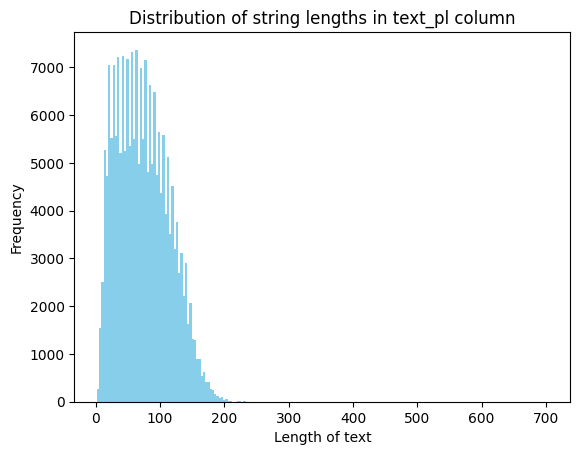

In [62]:
import matplotlib.pyplot as plt

df['text_pl_length'] = df["text_pl"].apply(lambda x: len(x))
plt.hist(df['text_pl_length'], bins=200, color='skyblue')

plt.xlabel('Length of text')
plt.ylabel('Frequency')
plt.title('Distribution of string lengths in text_pl column')

plt.show()


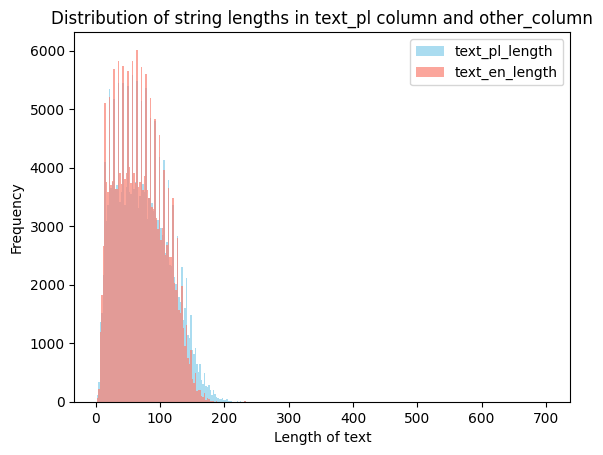

In [63]:
import matplotlib.pyplot as plt

df['text_en_length'] = df["text"].apply(lambda x: len(x))

plt.hist(df['text_pl_length'], bins=300, color='skyblue', alpha=0.7, label='text_pl_length')
plt.hist(df['text_en_length'], bins=300, color='salmon', alpha=0.7, label='text_en_length')

plt.xlabel('Length of text')
plt.ylabel('Frequency')
plt.title('Distribution of string lengths in text_pl column and other_column')
plt.legend()



Generalnie te samie zdania w języku polskim mają większa liczbę znaków, niż ich odpowiedniki w j. angielskim. Może się to okazać jednem z wyzwań, które należy sprawdzić w pracy. 

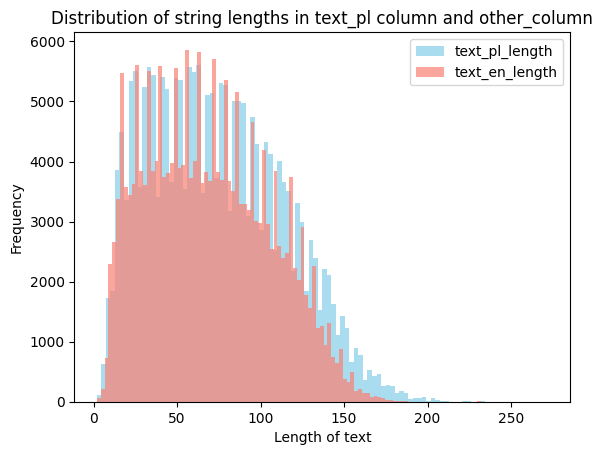

In [64]:
df['text_en_length'] = df["text"].apply(lambda x: len(x))

plt.hist(df[df['text_pl_length']<300]['text_pl_length'], bins=100, color='skyblue', alpha=0.7, label='text_pl_length')
plt.hist(df[df['text_en_length']<300]['text_en_length'], bins=100, color='salmon', alpha=0.7, label='text_en_length')

plt.xlabel('Length of text')
plt.ylabel('Frequency')
plt.title('Distribution of string lengths in text_pl column and other_column')
plt.legend()



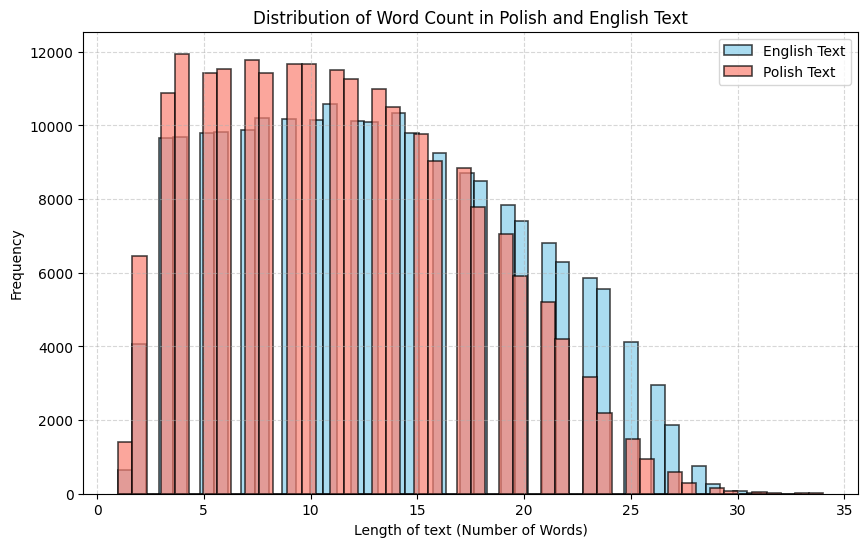

In [65]:
df['text_en_word_length'] = df["text"].apply(lambda x: len(x.split()))
df['text_pl_word_length'] = df["text_pl"].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))

plt.hist(df['text_en_word_length'], bins=50, color='skyblue', alpha=0.7, label='English Text', edgecolor='black', linewidth=1.2)
plt.hist(df['text_pl_word_length'], bins=50, color='salmon', alpha=0.7, label='Polish Text', edgecolor='black', linewidth=1.2)

plt.xlabel('Length of text (Number of Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Word Count in Polish and English Text')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.5)

plt.show()



Prównując długość słów występującym w komentarzach w j. angielkim i ich odpowiedników w polskim, widoczne jest, że angielskie teksty posiadają większą liczbę słów niż polskie. 

In [1]:
#TODO sprawdzić dla tokenów 

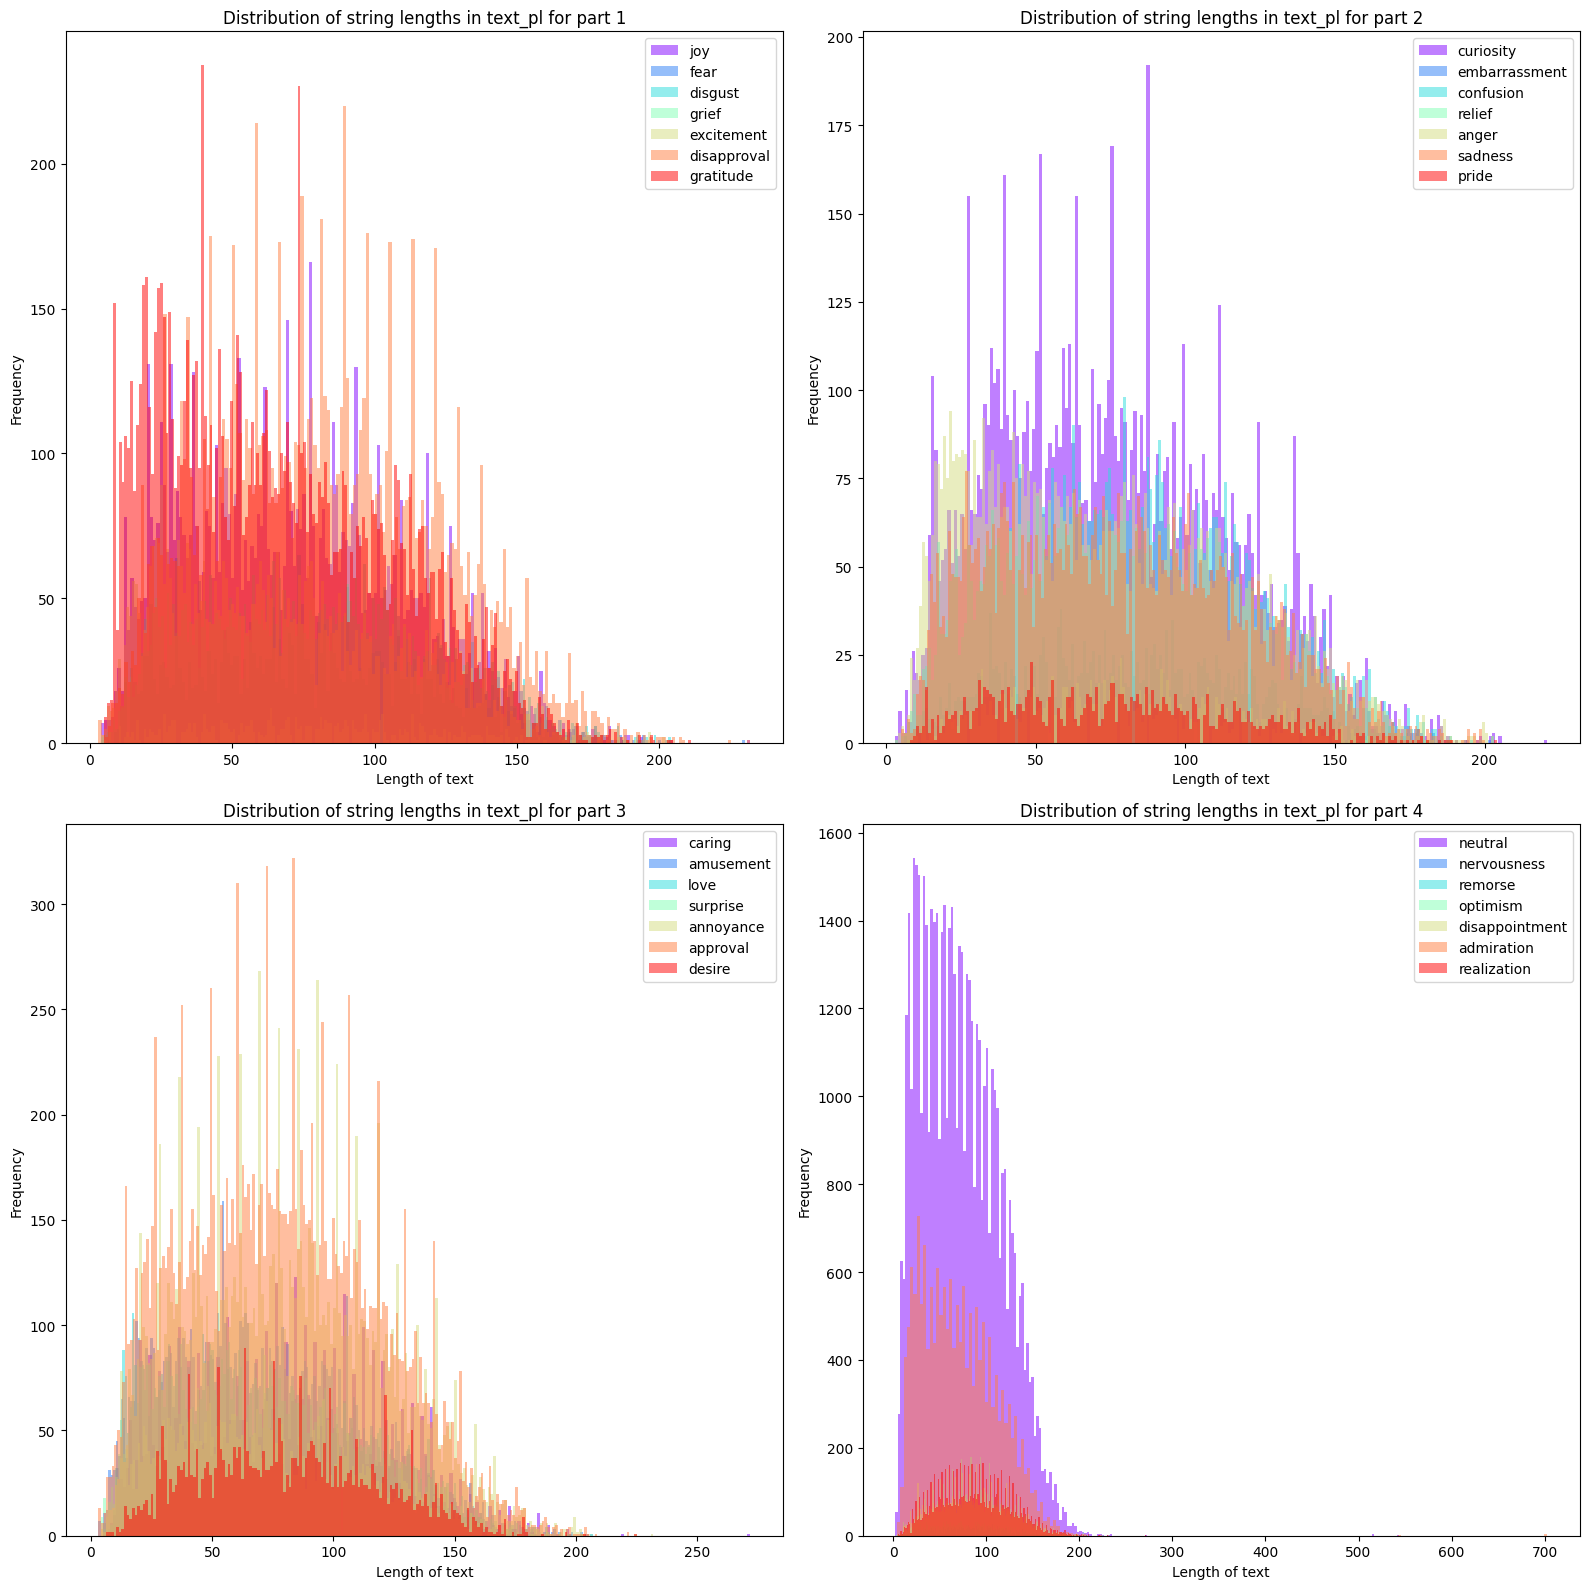

In [66]:
from matplotlib.pyplot import cm

num_parts = 4
part_size = len(emotions) // num_parts
emotion_parts = [list(emotions)[i:i + part_size] for i in range(0, len(emotions), part_size)]

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

color = cm.rainbow(np.linspace(0, 1, part_size))

for part_index, part_emotions in enumerate(emotion_parts):
    row_index = part_index // 2
    col_index = part_index % 2
    ax = axes[row_index, col_index]
    for i, emotion in enumerate(part_emotions):
        ax.hist(df[df[emotion]==1]['text_pl_length'], bins=200, color=color[i], alpha=0.5, label=f'{emotion}')
    ax.set_xlabel('Length of text')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of string lengths in text_pl for part {part_index+1}')
    ax.legend()

plt.tight_layout()
plt.show()


Nie widoczna jest zależność między długością tekstu w korpusie polskim, a sklasyfikowana emocją.

In [2]:
#TODO czy emocje zależa od wielkich litter

W korpusie wiele zdań powtarza się powiędzy poszczegónymi wierszami. Lista posortowanych najczęsciej powtarzających komentarzy znajduje się poniżej.   

In [67]:
df["text_pl"].value_counts()[:15]

Dziękuję.                    56
Dziękuję!                    47
Szczęśliwego dnia ciasta!    39
Dziwny flex, ale ok          33
Wszystkiego najlepszego!     31
Powodzenia!                  28
Uwielbiam to                 28
O tak                        27
Uwielbiam to.                26
[NAZWA].                     25
Nie ma za co                 24
Podoba mi się                22
Szczęśliwego Nowego Roku!    22
[NAZWA]                      22
To niesamowite!              22
Name: text_pl, dtype: int64

0.27% zbioru danych to komentarze powtarzające się. 

In [68]:
print(df["text_pl"].drop_duplicates().shape[0] / df["text_pl"].shape[0])
df["text_pl"].drop_duplicates().shape, df["text_pl"].shape

0.27181441590720795


((57414,), (211225,))

In [69]:
import plotly.express as px

emotion_counts = {}
for c in emotions:
    emotion_counts[c]  = df[c].value_counts().to_dict()[1]
emotion_counts = dict(sorted(emotion_counts.items(), key=lambda item: item[1], reverse=True))

    
fig = px.bar(x=list(emotion_counts.keys()), y=list(emotion_counts.values()))
fig.update_layout(title = 'Go Emotions', height = 600, xaxis_title="", yaxis_title="Number of Texts", plot_bgcolor='#fff')
fig.show()

Zbiór danych jest silnie niezbalansowany, najwięcej jest przykładów oznaczonych jako neutral-55298, a najrzdszą emocją jest grief-673. 

In [70]:
emotion_counts.items()

dict_items([('neutral', 55298), ('approval', 17620), ('admiration', 17131), ('annoyance', 13618), ('gratitude', 11625), ('disapproval', 11424), ('curiosity', 9692), ('amusement', 9245), ('realization', 8785), ('optimism', 8715), ('disappointment', 8469), ('love', 8191), ('anger', 8084), ('joy', 7983), ('confusion', 7359), ('sadness', 6758), ('caring', 5999), ('excitement', 5629), ('surprise', 5514), ('disgust', 5301), ('desire', 3817), ('fear', 3197), ('remorse', 2525), ('embarrassment', 2476), ('nervousness', 1810), ('pride', 1302), ('relief', 1289), ('grief', 673)])

In [71]:
import plotly.express as px

emotion_counts_positive = {k: v for k,v in emotion_counts.items() if k in positive_col}

    
fig = px.bar(x=list(emotion_counts_positive.keys()), y=list(emotion_counts_positive.values()))
fig.update_layout(title = 'Go Emotions positive classes', height = 400, xaxis_title="", yaxis_title="Number of Texts", plot_bgcolor='#fff')
fig.show()

In [72]:
import plotly.express as px

emotion_counts_negative = {k: v for k,v in emotion_counts.items() if k in negative_col}

    
fig = px.bar(x=list(emotion_counts_negative.keys()), y=list(emotion_counts_negative.values()))
fig.update_layout(title = 'Go Emotions negative classes', height = 300, xaxis_title="", yaxis_title="Number of Texts", plot_bgcolor='#fff')
fig.show()

In [73]:
import plotly.express as px

emotion_counts_ambiguous = {k: v for k,v in emotion_counts.items() if k in ambiguous_col}

    
fig = px.bar(x=list(emotion_counts_ambiguous.keys()), y=list(emotion_counts_ambiguous.values()))
fig.update_layout(title = 'Go Emotions ambiguous classes', height = 300, xaxis_title="", yaxis_title="Number of Texts", plot_bgcolor='#fff')
fig.show()

Żaden przykład ze ze zbioru nie został oznaczony jako trudny do zaklasyfiokowania. 

In [74]:
example_very_unclear = df['example_very_unclear'].value_counts()
missing_category = pd.Series({True: 0})
example_very_unclear = pd.concat([example_very_unclear, missing_category])
example_very_unclear

False    211225
True          0
dtype: int64

Text(0.5, 1.0, 'Example Very Unclear')

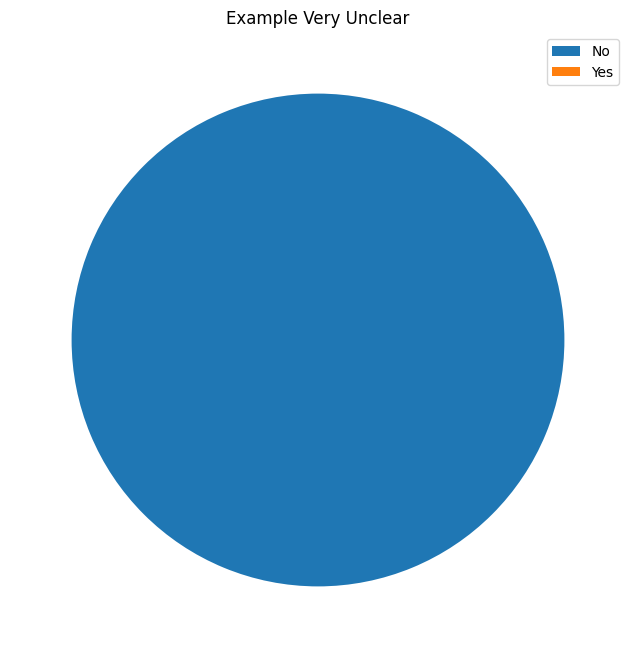

In [75]:
plt.figure(figsize=(8, 8))
plt.pie(example_very_unclear, labels=['', '']) 
plt.legend(['No', 'Yes'], loc='upper right')
plt.title('Example Very Unclear')

In [76]:
df['example_very_unclear'].value_counts()

False    211225
Name: example_very_unclear, dtype: int64

Czy przykłady mogą byc oznaczone więcej niż 1 emocja?

In [83]:
df[emotions].sum(axis=1).value_counts()

/tmp/ipykernel_15411/1500882681.py:1: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



1     171820
2      31187
3       4218
0       3411
4        399
5        106
6         53
7         20
8          6
9          3
10         1
12         1
dtype: int64

In [101]:
print(df[df[list(emotions)].sum(axis=1) == 12]["text_pl"].values[0])

Dwa lub trzy leki przeciwdepresyjne, zanim powiedziałam im kłamstwo o tym, że wypróbowałam valium mojej mamy i zadziałało


Czy jakieś emocje występują razem?

<Axes: >

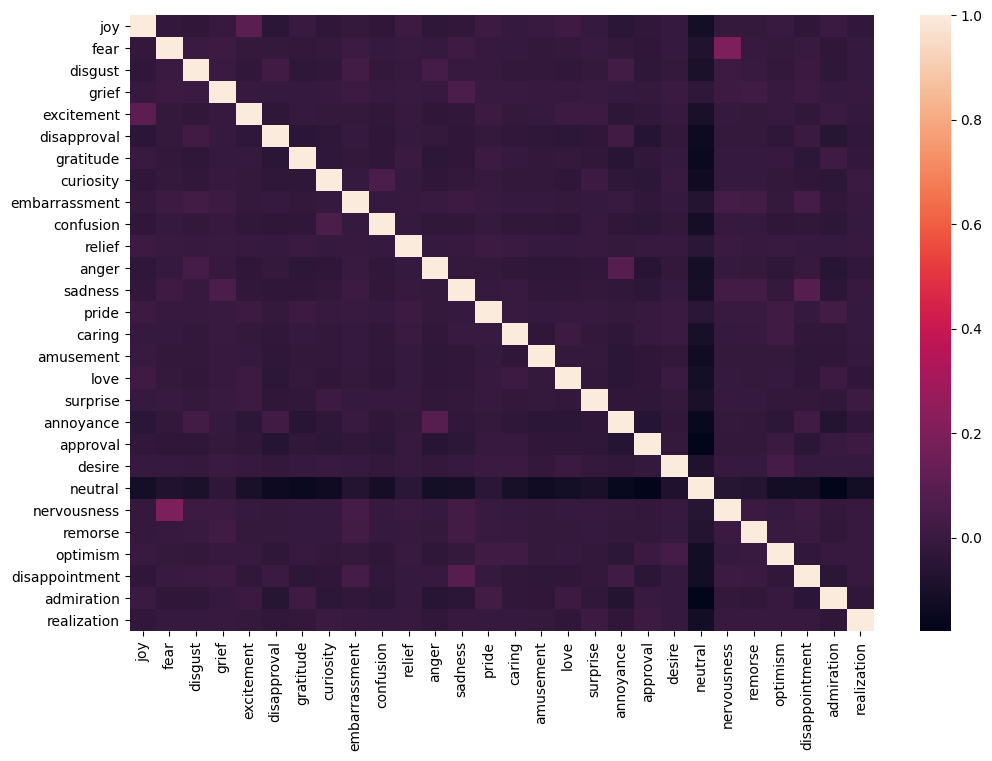

In [105]:
import seaborn as sns

plt.figure(figsize=(12, 8))

sns.heatmap(df[list(emotions)].corr())